###Demonstrate using the simulator at the region level with a stimulus.

``Run time``: approximately 2 seconds (workstation circa 2010).

``Memory requirement``: < 1GB

In [2]:
from tvb.simulator.lab import *

####Perform the simulation

In [3]:
LOG.info("Configuring...")

In [4]:
#Initialize a Model, Coupling, and Connectivity.
oscillator = models.Generic2dOscillator()

white_matter = connectivity.Connectivity.from_file("connectivity_96.zip")
white_matter.speed = numpy.array([4.0])
white_matter_coupling = coupling.Linear(a=0.0126)

In [5]:
#Initialise an Integrator
heunint = integrators.HeunDeterministic(dt=2 ** -4)

In [6]:
#Initialise some Monitors with period in physical time
momo = monitors.Raw()
mama = monitors.TemporalAverage(period=2 ** -2)

#Bundle them
what_to_watch = (momo, mama)

In [7]:
#Define the stimulus
#Specify a weighting for regions to receive stimuli...
white_matter.configure()
nodes = [0, 7, 13, 33, 42]
weighting = numpy.zeros((white_matter.number_of_regions,))
weighting[nodes] = numpy.array([2.0 ** -2, 2.0 ** -3, 2.0 ** -4, 2.0 ** -5, 2.0 ** -6])

eqn_t = equations.Gaussian()
eqn_t.parameters["midpoint"] = 16.0

stimulus = patterns.StimuliRegion(temporal=eqn_t,
                                  connectivity=white_matter,
                                  weight=weighting)

In [8]:
#Initialise Simulator -- Model, Connectivity, Integrator, Monitors, and stimulus.
sim = simulator.Simulator(model=oscillator,
                          connectivity=white_matter,
                          coupling=white_matter_coupling,
                          integrator=heunint,
                          monitors=what_to_watch,
                          stimulus=stimulus)

sim.configure()

In [9]:
#Clear the initial transient, so that the effect of the stimulus is clearer.
#NOTE: this is ignored, stimuli are defined relative to each simulation call.
LOG.info("Initial integration to clear transient...")
for _, _ in sim(simulation_length=128):
    pass

In [10]:
LOG.info("Starting simulation...")
#Perform the simulation
raw_data = []
raw_time = []
tavg_data = []
tavg_time = []
for raw, tavg in sim(simulation_length=64):
    if not raw is None:
        raw_time.append(raw[0])
        raw_data.append(raw[1])
    
    if not tavg is None:
        tavg_time.append(tavg[0])
        tavg_data.append(tavg[1])

LOG.info("Finished simulation.")

####Plot pretty pictures of what we just did

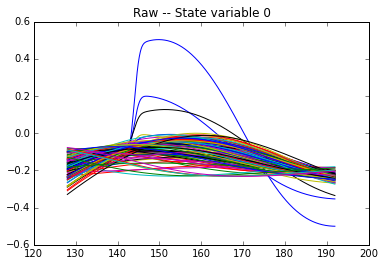

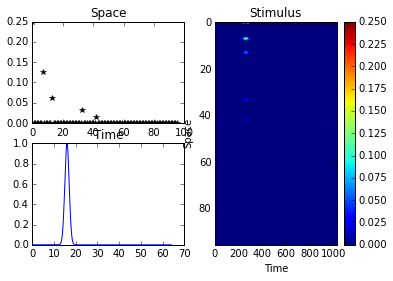

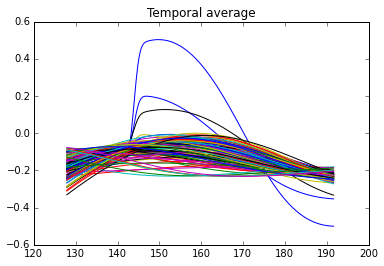

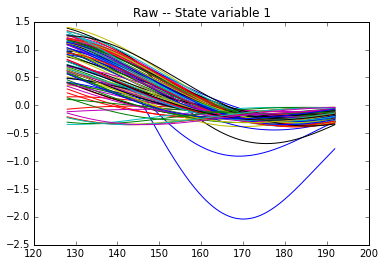

In [11]:
#Plot defaults in a few combinations

#Plot the stimulus
plot_pattern(sim.stimulus)

#Make the lists numpy.arrays for easier use.
RAW = numpy.array(raw_data)
TAVG = numpy.array(tavg_data)

#Plot raw time series
figure(1)
plot(raw_time, RAW[:, 0, :, 0])
title("Raw -- State variable 0")

figure(2)
plot(raw_time, RAW[:, 1, :, 0])
title("Raw -- State variable 1")

#Plot temporally averaged time series
figure(3)
plot(tavg_time, TAVG[:, 0, :, 0])
title("Temporal average")

#Show them
show()